# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import make_pipeline


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


np.set_printoptions(precision=3)

%matplotlib inline

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_excel("mpg.data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   1 non-null      object 
dtypes: float64(7), int64(4), object(2)
memory usage: 41.4+ KB



The above nine columns with data:

1.   Mpg (miles per gallon)
2.   Cylinders (number of cylinders)
3. Displayments
4. Horsepower
5. Weight (in kilos)
6. Acceleration
7. Model year (only the last two digit of the year)
8. Origin (as number)
9. Car name


So, 406 inputs and 9 columns in total. Important!! Columns 10-13 have not column names and we drop them

In [3]:
df = df.dropna(axis=1, thresh= 200)
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Descriptive Statistics

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.50,23.0,29.000,46.6
cylinders,406.0,5.475369,1.712160,3.0,4.00,4.0,8.000,8.0
displayments,406.0,194.779557,104.922458,68.0,105.00,151.0,302.000,455.0
horsepower,400.0,105.082500,38.768779,46.0,75.75,95.0,130.000,230.0
weight,406.0,2979.413793,847.004328,1613.0,2226.50,2822.5,3618.250,5140.0
acceleration,406.0,15.519704,2.803359,8.0,13.70,15.5,17.175,24.8
model year,406.0,75.921182,3.748737,70.0,73.00,76.0,79.000,82.0
origin,406.0,1.568966,0.797479,1.0,1.00,1.0,2.000,3.0


In [5]:
df.nunique()

mpg             129
cylinders         5
displayments     83
horsepower       93
weight          356
acceleration     96
model year       13
origin            3
car name        312
dtype: int64

In [6]:
df.duplicated().sum()

0

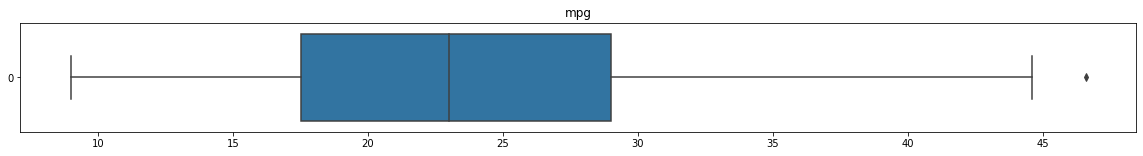

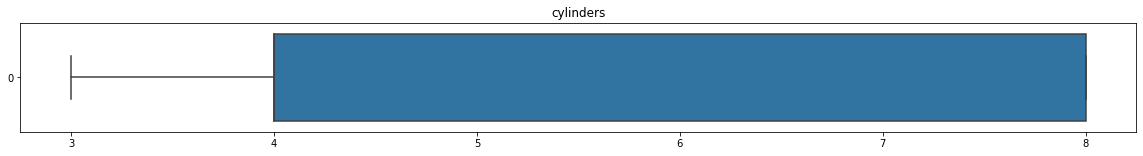

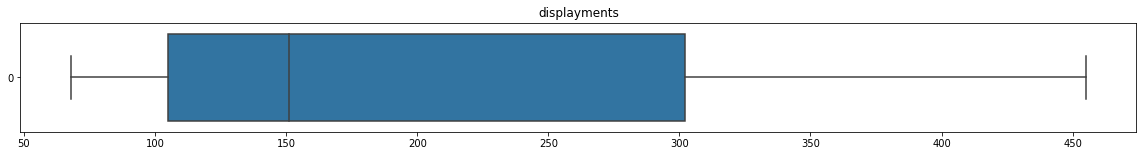

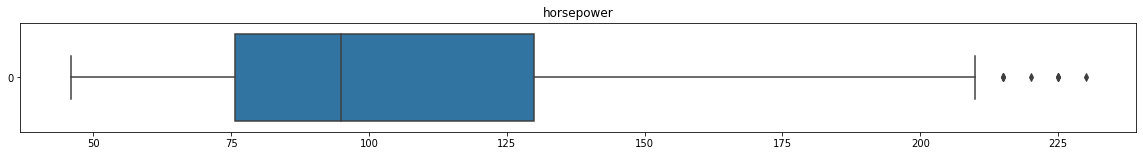

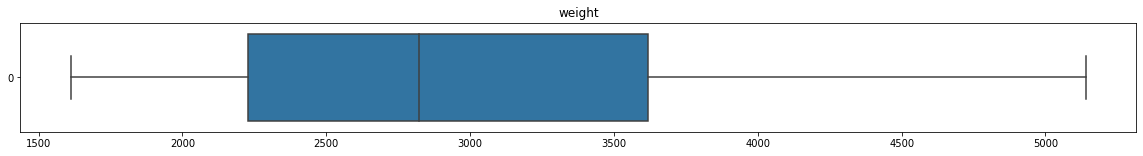

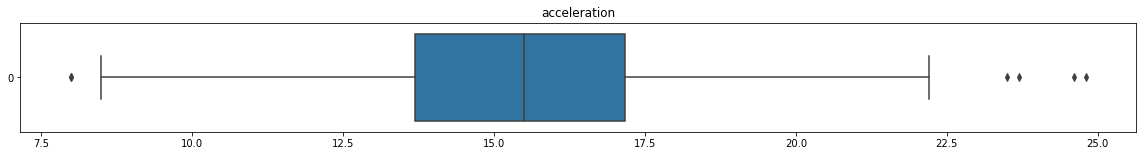

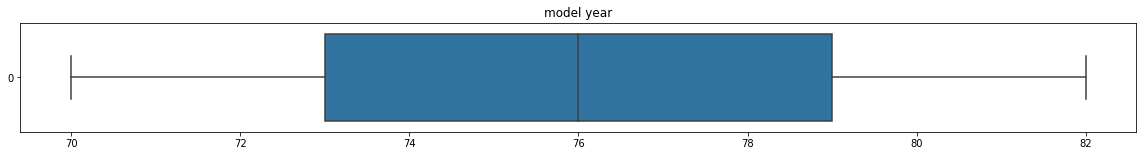

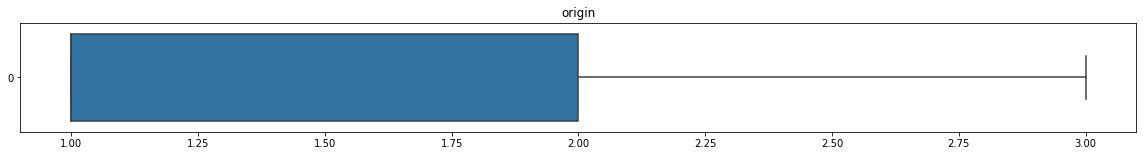

In [7]:
for i in df._get_numeric_data().columns:
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 2))
  sns.boxplot(data=df[i], orient="h", color='C0').set_title(i)
  plt.show()

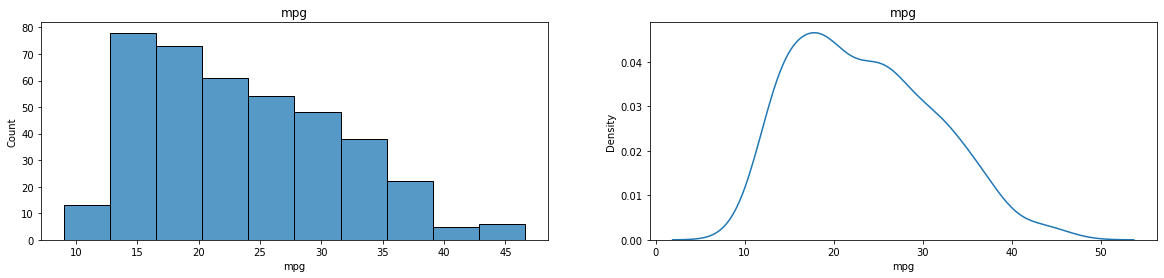

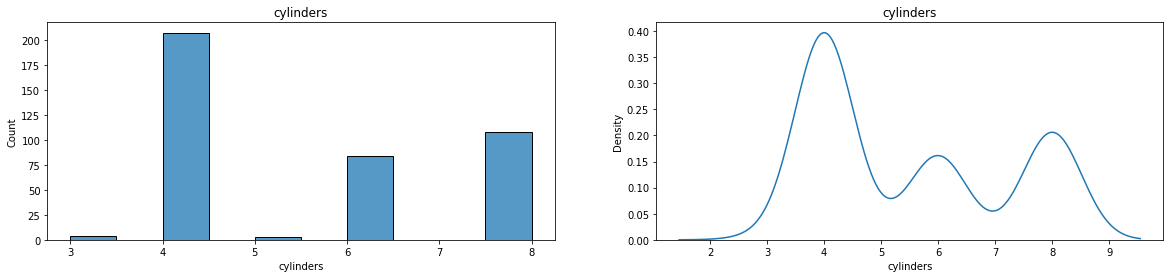

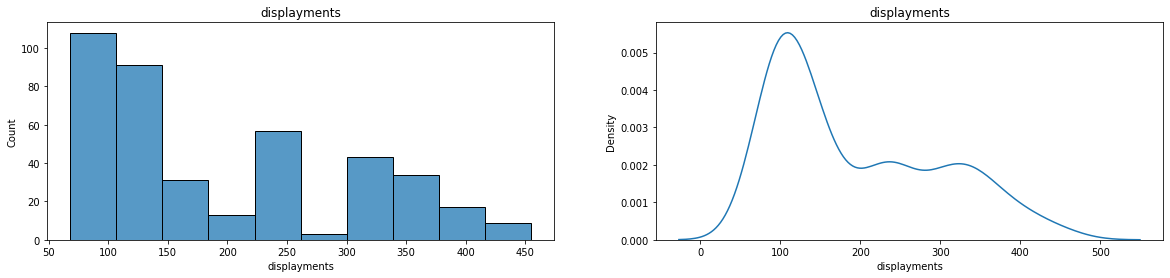

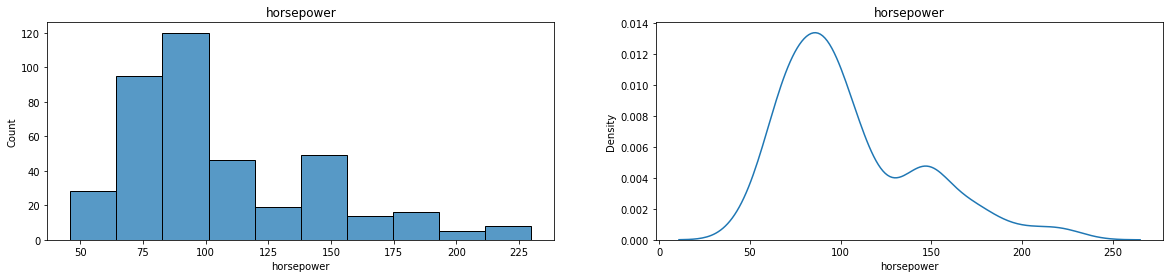

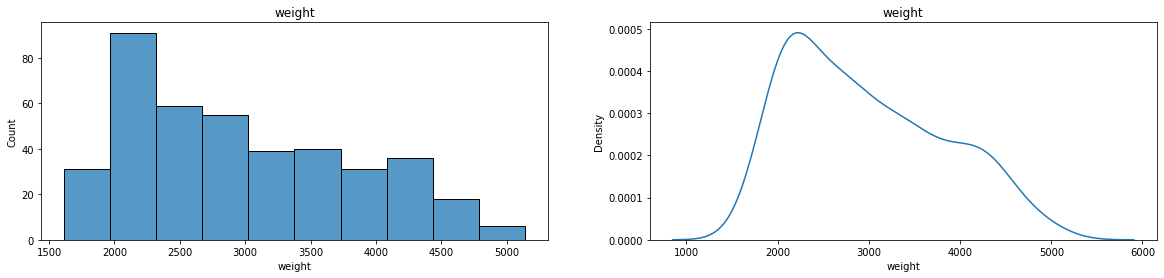

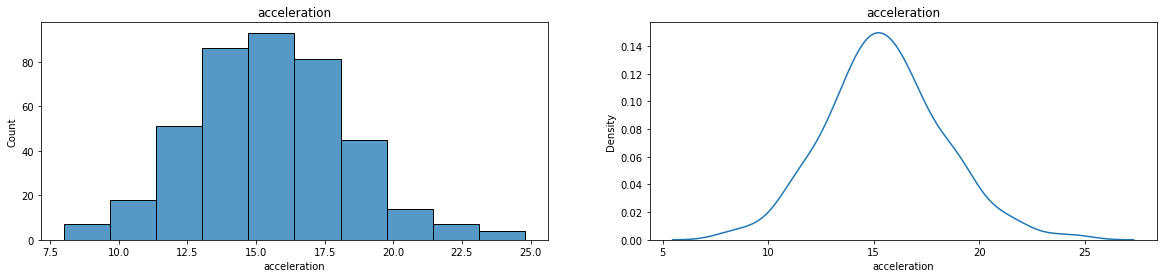

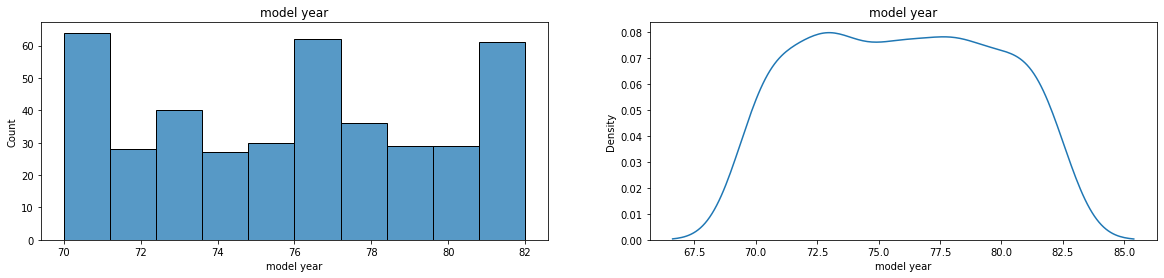

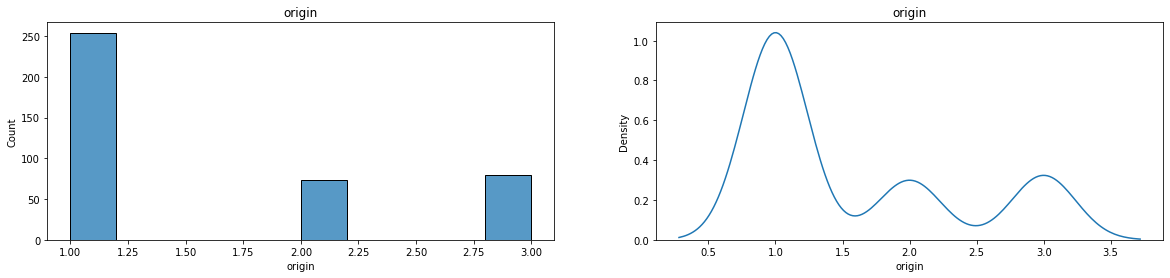

In [8]:
for i in df._get_numeric_data().columns:
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
  sns.histplot(df[i], bins=10, ax=axes[0], color='C0')
  axes[0].set_title(i)
  sns.kdeplot(df[i], ax=axes[1], color='C0')
  axes[1].set_title(i)
  plt.show()

Correlation diagrams

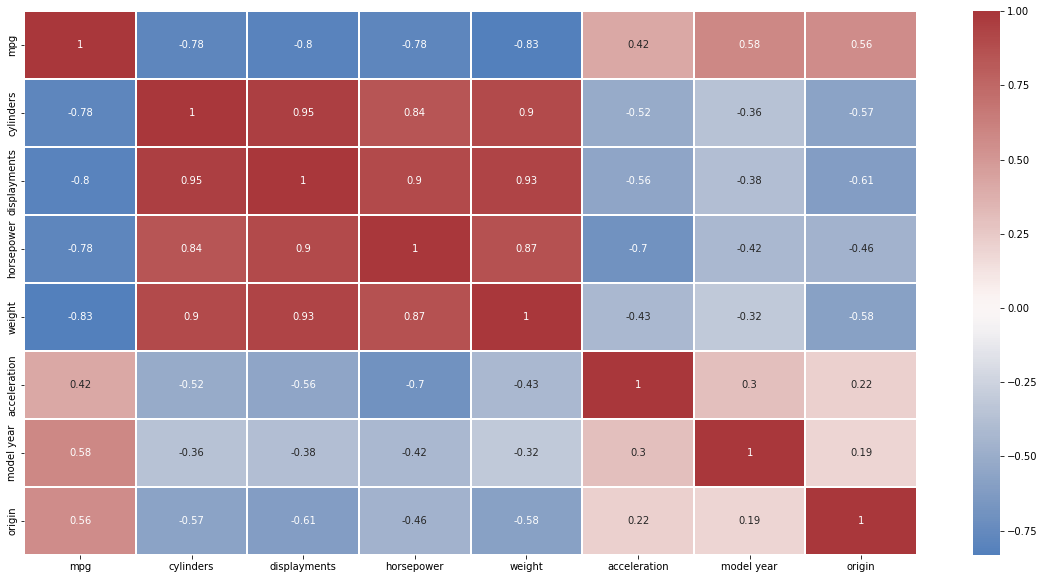

In [9]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, center=0,cmap="vlag",linewidths=0.4)
plt.show()

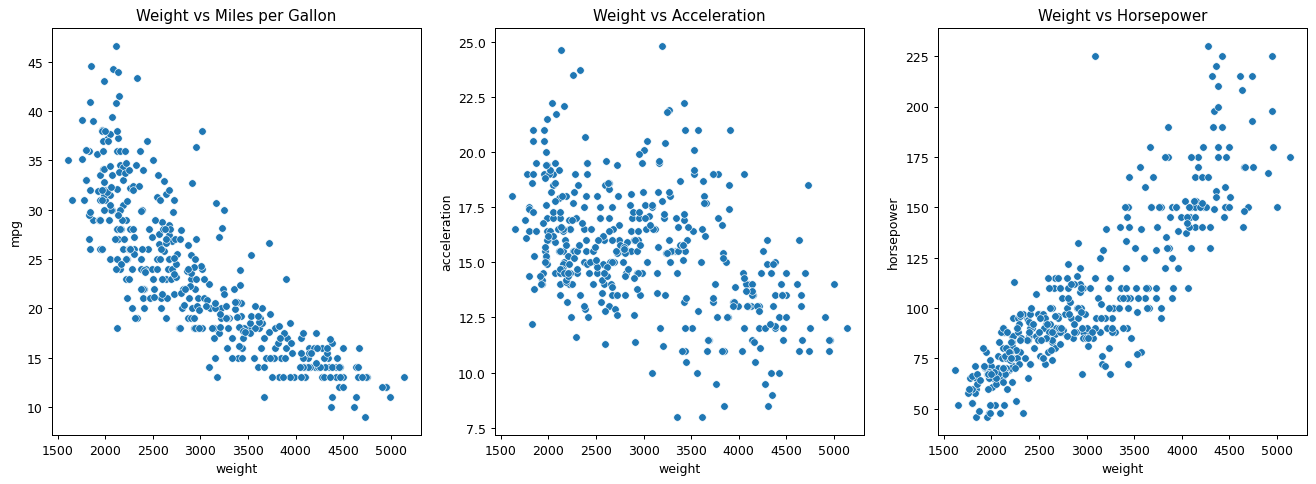

In [10]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="weight", y="mpg", data=df, ax=axes[0], color='C0')
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="weight", y="acceleration", data=df, ax=axes[1], color='C0')
axes[1].set_title("Weight vs Acceleration")

sns.scatterplot(x="weight", y="horsepower", data=df,  ax=axes[2], color='C0')
axes[2].set_title("Weight vs Horsepower")

plt.show()

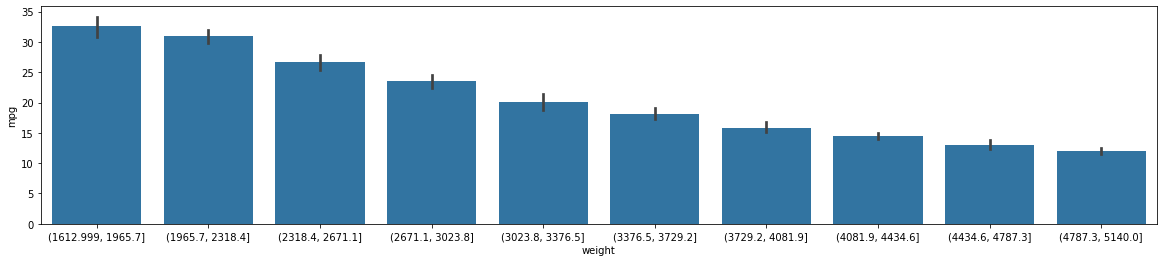

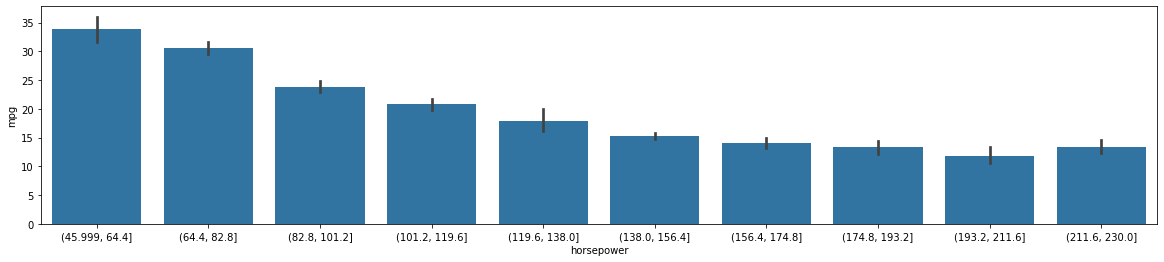

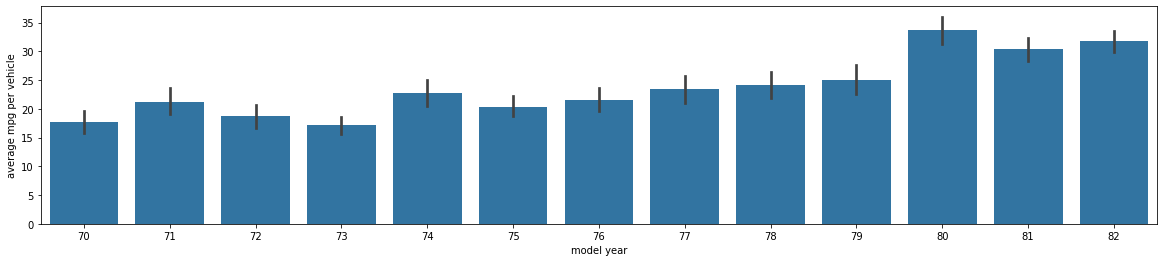

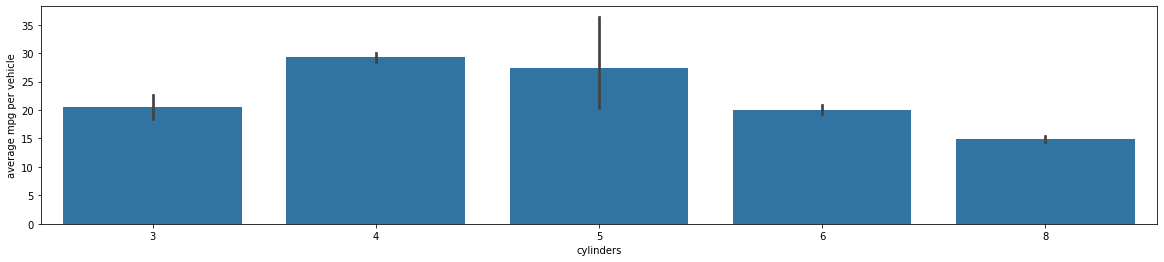

In [11]:
df['weight'] = df['weight'].astype(float)


for x in ['weight','horsepower','model year','cylinders']:
  if df[x].dtypes == float:
    bin_size=(df[x].max()-df[x].min())/10
    bins=[df[x].min()]
    for i in range(10):
      bins.append(bins[0]+(i+1)*bin_size)
  
    fig = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
    out = pd.cut(df[x], bins, include_lowest=True)
    sns.barplot(x=out, y='mpg',color='C0' , data=df)
  else:
    fig= plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
    sns.barplot(x=x, y='mpg',color='C0' , data=df)
    plt.ylabel('average mpg per vehicle')

  
  plt.show()

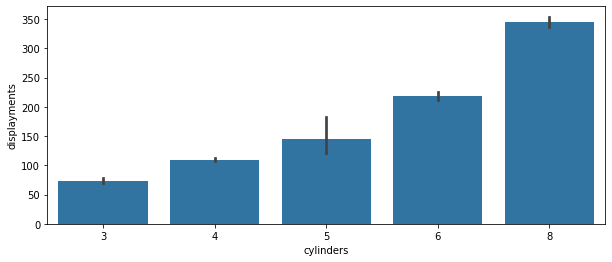

In [12]:
fig= plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
sns.barplot(x='cylinders', y='displayments', data=df, color='C0')
  
plt.show()

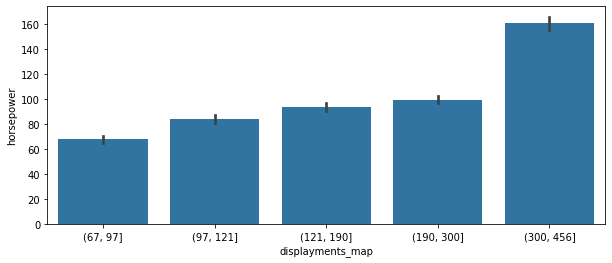

In [13]:
displayments_map = pd.cut(df['displayments'],bins=(67,97,121,190,300,456))
df2= pd.DataFrame({
    'displayments_map':displayments_map,
    'mpg':df['mpg']
})
df2 = pd.concat([df2, df['horsepower']], axis=1)

fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
sns.barplot(x='displayments_map', y='horsepower', data=df2, color='C0')

plt.show()

# Preprocessing



1.   Handling missing values
2.  Check and handle outliers
3.  Split the Dataset
4.   Encoding the categorical feature 'origin'

## 1.Missing Values

In [14]:
df[df['mpg'].isnull()]

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4,133.0,115.0,3090.0,17.5,70,2,citroen ds-21 pallas
11,NaN,8,350.0,165.0,4142.0,11.5,70,1,chevrolet chevelle concours (sw)
12,NaN,8,351.0,153.0,4034.0,11.0,70,1,ford torino (sw)
13,NaN,8,383.0,175.0,4166.0,10.5,70,1,plymouth satellite (sw)
14,NaN,8,360.0,175.0,3850.0,11.0,70,1,amc rebel sst (sw)
17,NaN,8,302.0,140.0,3353.0,8.0,70,1,ford mustang boss 302
39,NaN,4,97.0,48.0,1978.0,20.0,71,2,volkswagen super beetle 117
367,NaN,4,121.0,110.0,2800.0,15.4,81,2,saab 900s


In [15]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
133,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
337,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
343,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
361,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
382,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [16]:
df.isna().sum()

mpg             8
cylinders       0
displayments    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Missing Values in mpg

In [17]:
df = df.dropna(axis = 0,subset=['mpg'])

Missing Values in horsepower

In [18]:
df['horsepower'] =df['horsepower'].fillna(df['horsepower'].median())
df.isna().sum()

mpg             0
cylinders       0
displayments    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Create car_company column from car name column

In [19]:
df['car_company'] = df['car name'].apply(lambda x: x.split()[0])

In [20]:
df['car_company'].replace({'vokswagen': 'volkswagen',
            'vw': 'volkswagen', 
            'maxda': 'mazda', 
            'toyouta': 'toyota',
            'mercedes-benz': 'mercedes',
            'chevy': 'chevrolet',
            'chevroelt': 'chevrolet'}, inplace=True)

In [21]:
df.groupby('origin')['car_company'].nunique()

origin
1    13
2    11
3     6
Name: car_company, dtype: int64

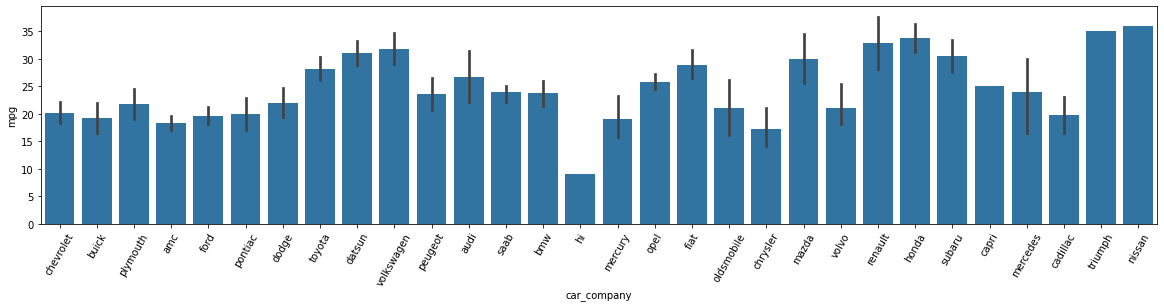

In [22]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
sns.barplot(x='car_company', y='mpg', data=df, color='C0')
plt.xticks(rotation=60)

plt.show()

## 2.Check and handle outliers

In [23]:
def outliers(df, col_name, q1=0.10, q3=0.90):
  quartile1 = df[col_name].quantile(q1)
  quartile3 = df[col_name].quantile(q3)
  IQR = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * IQR
  low_limit = quartile1 - 1.5 * IQR
  return df[(df[col_name]>=low_limit) & (df[col_name]<=up_limit)]

In [24]:
df = outliers(df,'acceleration')

In [25]:
df = outliers(df,'horsepower')

## 3.Split the Dataset

In [26]:
dict_region = {1:'USA',2:'Europe',3:'Japan'}
df['origin'] = df['origin'].replace(dict_region)

In [27]:
y =  df['mpg']
X = df.iloc[:,[1,2,3,4,5,6,7]]

In [28]:
seed = 42  
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=seed)

## 4.Encoding the categorical feature 'origin'

In [29]:
#OneHotEncoder for X_train
encoder = OneHotEncoder( handle_unknown="ignore")
X_train = X_train.reset_index()
enc = pd.DataFrame(encoder.fit_transform(X_train[['origin']]).toarray())
X_train = X_train.join(enc)
X_train.set_index('index', inplace=True)
#drop 'origin'
X_train = X_train.drop(columns=['origin'])

#OneHotEncoder for X_test
X_test = X_test.reset_index()
enc = pd.DataFrame(encoder.transform(X_test[['origin']]).toarray())
X_test = X_test.join(enc)
X_test.set_index('index', inplace=True)
#drop 'origin'
X_test = X_test.drop(columns=['origin'])

# Model

## Pipeline

In [30]:
scaler = StandardScaler() 
knr = KNeighborsRegressor(algorithm='ball_tree', leaf_size=5, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='uniform')

# create a pipeline with the scaler and the knr
pipe = make_pipeline(scaler, knr)

# train using the pipe
pipe.fit(X_train, y_train)

#predict the model
pred_test = pipe.predict(X_test)
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')
print(f'R2:{r2_score(y_test,pred_test)}')

Root Mean Squared Error: 2.2463971153827633
Mean Absolute Error: 1.7474999999999998
R2:0.9061440622060856


C:\Users\thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
def predictmpg(car_stats):
    if car_stats.dtype=='float64' and car_stats.shape==(1,9):
        prediction=pipe.predict(car_stats)
        return print(float(prediction))
    else:
        print('Give car stats with a (1,9) float64 array')
    

# Example for mpg prediction

In [32]:
#Give car stats with a (1,9) float64 array

In [33]:
car_stats_for_prediction=np.array([8,383.0,175.0,2166,17.5,72,1,0,0]).reshape(1,-1)

In [34]:
predictmpg(car_stats_for_prediction)

20.54
